# Computing Meridional Overturning

In [1]:
# Don't display filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import xarray as xr
import os
from dask.diagnostics import ProgressBar
from wmt_inert_tracer.preprocessing import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
outdir='/work/jet/data/interim/'

# Odiv-233, 232, 231, 230
rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/'
# Odiv-226, Odiv-210, Odiv-209, Odiv-207, Odiv-206, Odiv-200, Odiv-191, Odiv-184
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/' 
#rootdir = '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/' # Odiv-183, Odiv-170


#subdir = 'CM4_historical_c192_OM4p125' # odiv-233
#subdir = 'CM4_ssp585_c192_OM4p25' # odiv-232
subdir = 'CM4_historical_c192_OM4p25' # Odiv-231
#subdir = 'CM4_piControl_c192_OM4p25_v8' # odiv-230
#subdir = 'CM4_piControl_c192_OM4p25_v7_npolefix' # Odiv-226
#subdir = 'CM4_piControl_c192_OM4p25_v7' # Odiv-210
#subdir = 'CM4_piControl_c192_OM4p125_v7' # Odiv-209
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt3' # Odiv-207
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt2' # Odiv-206
#subdir = 'CM4_piControl_c192_OM4p125_v6_alt1' # Odiv-200
#subdir = 'CM4_piControl_c192_OM4p125_v6' # Odiv-191
#subdir = 'CM4_piControl_c192_OM4p125_v5' # Odiv-184
#subdir = 'CM4_piControl_c192_OM4p125_v5_proto1' # Odiv-183
#subdir = 'CM4_piControl_c192_OM4p25' # Odiv-170

platform = 'gfdl.ncrc4-intel18-prod-openmp'

In [4]:
pp = 'ocean_annual_z' # ocean_annual_z, ocean_monthly_z
full_path = os.path.join(rootdir,subdir,platform,'pp',pp)+'/ts/annual/10yr/'
frq = pp.split('_')[1]

In [5]:
var = '*'
tprd = '*'

print('dmls -lah',full_path+pp+'.%s.%s.nc'%(tprd,var))
print('dmget',full_path+pp+'.%s.%s.nc'%(tprd,var),'&')

dmls -lah /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/10yr/ocean_annual_z.*.*.nc
dmget /archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_annual_z/ts/annual/10yr/ocean_annual_z.*.*.nc &


In [6]:
vars_ds = xr.open_mfdataset(full_path+pp+'.%s.%s.nc'%(tprd,var),use_cftime=True, 
                            drop_variables=['average_DT','average_T1','average_T2','time_bnds'])

In [7]:
print(vars_ds.dims)

Frozen({'time': 160, 'z_i': 36, 'yh': 1080, 'xh': 1440, 'nv': 2, 'z_l': 35, 'xq': 1441, 'yq': 1081})


In [8]:
grid = xr.open_dataset(os.path.join(rootdir,subdir,platform,'pp',pp)+'/'+pp+'.static.nc')

In [9]:
import pandas as pd

In [10]:
pd.concat([vars_ds.xh.to_series().reset_index(drop=True), vars_ds.xq.to_series().reset_index(drop=True),
           grid.xh.to_series().reset_index(drop=True), grid.xq.to_series().reset_index(drop=True)], axis=1)

,xh,xq,xh,xq
0,-299.724244,-299.842324,-299.724244,-299.842324
1,-299.476198,-299.594355,-299.476198,-299.594355
2,-299.228150,-299.346385,-299.228150,-299.346385
3,-298.980100,-299.098412,-298.980100,-299.098412
4,-298.732048,-298.850438,-298.732048,-298.850438
...,...,...,...,...
1436,59.283593,59.165825,59.283593,59.165825
1437,59.531631,59.413784,59.531631,59.413784
1438,59.779670,59.661746,59.779670,59.661746
1439,60.027712,59.909710,60.027712,59.909710


In [11]:
pd.concat([vars_ds.yh.to_series().reset_index(drop=True), vars_ds.yq.to_series().reset_index(drop=True),
           grid.yh.to_series().reset_index(drop=True), grid.yq.to_series().reset_index(drop=True)], axis=1)

,yh,yq,yh,yq
0,-80.389238,-80.429819,-80.389238,-80.429819
1,-80.308075,-80.348657,-80.308075,-80.348657
2,-80.226911,-80.267493,-80.226911,-80.267493
3,-80.145748,-80.186329,-80.145748,-80.186329
4,-80.064587,-80.105167,-80.064587,-80.105167
...,...,...,...,...
1076,89.621693,89.567649,89.621693,89.567649
1077,89.729781,89.675737,89.729781,89.675737
1078,89.837868,89.783825,89.837868,89.783825
1079,89.945956,89.891912,89.945956,89.891912


In [12]:
#grid = grid.assign_coords({'xh':vars_ds.xh,'yh':vars_ds.yh,'xq':vars_ds.xq,'yq':vars_ds.yq}) # p125_d2
grid = grid.isel(xq=slice(1,None),yq=slice(1,None)) # p25

vars_ds = vars_ds.isel(xq=slice(1,None),yq=slice(1,None)) # All
#grid = grid.isel(xq=slice(None,-1),yq=slice(None,-1)) # p125

In [13]:
ds = preprocessing(vars_ds, grid, decode_times=False, verbose=False)

In [14]:
print(str(ds.time.values[0])[:10],'to',str(ds.time.values[-1])[:10])

1850-07-02 to 2009-07-02


In [15]:
yr_st,yr_ed = '1900','1939'

In [16]:
rho0 = 1035.0
#contours = [-30,-26,-22,-18,-14,-10,-6,-2,2,6,10,14,18,22,26,30]
#contours = np.concatenate([np.arange(-25,0,5),np.array([-2,2]),np.arange(5,30,5)])
contours = np.concatenate([np.arange(-25,0,5),np.arange(5,30,5)])

### Global MOC

In [17]:
vmo = ds.vmo.where(ds.vmo<1e14)

# Sum over the zonal direction and integrate from bottom
integ_layers = vmo.sum('x').reindex(lev=vmo.lev[::-1]).cumsum('lev') # Reverse vertical (density) axis and integrate
#integ_layers = vmo.sum('x').cumsum('lev') - vmo.sum('x').sum('lev')

# The result of the integration over layers is evaluated at the interfaces
# with psi = 0 as the bottom boundary condition for the integration
bottom_condition = xr.zeros_like(integ_layers.isel({'lev': 0}))

# combine bottom condition with data array
#psi_raw = xr.concat([bottom_condition, integ_layers], dim='lev')
psi_raw = xr.concat([integ_layers.reindex(lev=integ_layers.lev[::-1]),bottom_condition], dim='lev')

# need to rechunk to new size
psi_raw = psi_raw.chunk({'lev': len(psi_raw['lev'])})

# rename to correct dimension and add correct vertical coordinate
psi = -psi_raw.rename({'lev': 'lev_outer'}).transpose('time','lev_outer','yq')
psi['lev_outer'] = ds.lev_outer
psi.name = 'psi'

# Convert kg.s-1 to Sv (1e6 m3.s-1)
moc = psi / rho0 / 1.0e6

In [18]:
with ProgressBar():
    moc_z = moc.load()

[########################################] | 100% Completed |  3min  2.8s


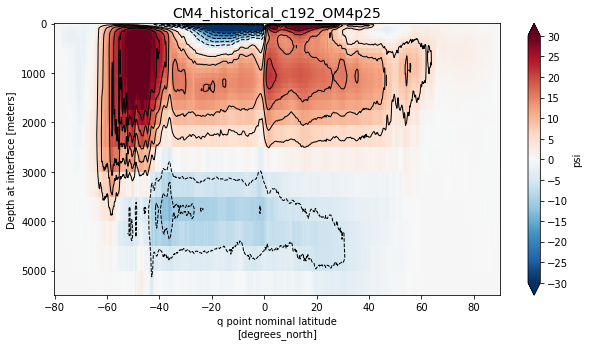

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
moc_z.mean('time').sel(lev_outer=slice(None,5500)).plot(ax=ax, yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',
                                                       cbar_kwargs={'ticks': np.arange(-30,35,5)})
moc_z.mean('time').sel(lev_outer=slice(None,5500)).plot.contour(ax=ax, yincrease=False, colors='k', linewidths=1,
                                                                levels=contours)
ax.set_title(subdir,fontsize=14)
plt.show()

In [22]:
# Check for missing time points
moc_z.isel(time=slice(0,-1))[moc_z.time.dt.year.diff(dim='time',label='lower') > 1].time

<xarray.DataArray 'time' (time: 0)>
array([], dtype=object)
Coordinates:
  * time     (time) object 
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  NOLEAP
    bounds:         time_bnds

In [21]:
var = 'moc'
fname = subdir+'_global_%sto%s_%s_z_%s.nc'\
        %(str(moc_z.time.dt.year[0].values).rjust(4, '0'),
          str(moc_z.time.dt.year[-1].values).rjust(4, '0'), var, frq)
print('Saving to file:', fname)
moc_z.reset_coords(drop=True).to_dataset(name='psi').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_global_1850to2009_moc_z_annual.nc


## AMOC

### Generate basin mask

In [11]:
from cmip_basins import generate_basin_codes

In [12]:
basincodes = generate_basin_codes(grid, lon='geolon_v', lat='geolat_v', mask='wet_v')

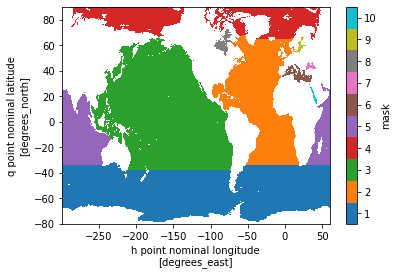

In [13]:
basincodes.where(grid['wet_v']==1).plot(cmap='tab10',vmin=0.5,vmax=10.5,cbar_kwargs={'ticks': np.arange(1,12,1)})

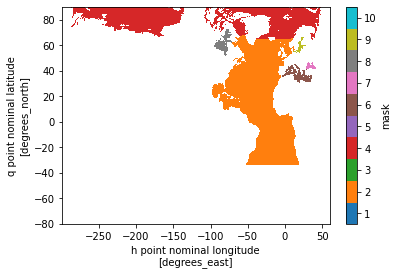

In [14]:
idx = [2, 4, 6, 7, 8, 9]
bmask = xr.DataArray(np.in1d(basincodes,idx).reshape(basincodes.shape),dims=basincodes.dims, 
                     coords=basincodes.coords)

basincodes.where(bmask==1).where(grid['wet_v']==1).plot(cmap='tab10',vmin=0.5,vmax=10.5,cbar_kwargs={'ticks': np.arange(1,12,1)})

In [15]:
mhead = 'p25'
mpath = '/work/jet/static/%s_bmaskv_AtlArc.nc'%mhead
bmask.reset_coords(drop=True).to_dataset(name='mask').to_netcdf(mpath, format='NETCDF4')

In [29]:
ls /work/jet/static/

CM4_piControl_c192_OM4p125_v7_volcello_rho2_hires.nc
CM4_piControl_c192_OM4p25_v7_bmaskv_AtlArc.nc
CM4_piControl_C_volcello_rho2_lores.nc
ESM4_piControl_D_volcello_rho2_lores.nc
ESM4_piControl_D_volcello_rho2.nc
p125_1000m_Isobath_Contour_Transport_Masks.nc
p125_bmaskv_AtlArc.nc
p125_d2_1000m_Isobath_Contour_Transport_Masks.nc
p125_d2_ocean_monthly_d2.static.nc
p125_ocean_monthly.static.nc
p25_1000m_Isobath_Contour_Transport_Masks.nc
p25_bmaskv_AtlArc.nc
p25_ocean_monthly.static.nc
p5_1000m_Isobath_Contour_Transport_Masks.nc
p5_bmask_AtlArc.nc
p5_bmaskv_AtlArc.nc
p5_ocean_monthly.static.nc
spear_bmaskv_AtlArc.nc


### Calculate AMOC streamfunction

In [23]:
use_d2 = False
if subdir.split('_')[3][3:]=='p125':
    mhead = subdir.split('_')[3][3:]+'_d2' if use_d2 else subdir.split('_')[3][3:]
else:
    mhead = subdir.split('_')[3][3:]
print('Loading',mhead+'_bmaskv_AtlArc.nc')
bmask = xr.open_dataset(outdir[:-13]+'static/'+mhead+'_bmaskv_AtlArc.nc').mask

Loading p25_bmaskv_AtlArc.nc


In [24]:
vmo = ds.vmo.where(bmask.rename({'xh':'x'})==1).where(grid['wet_v'].rename({'xh':'x'})==1).where(ds.vmo<1e14)

# Sum over the zonal direction and integrate from bottom
integ_layers = vmo.sum('x').reindex(lev=vmo.lev[::-1]).cumsum('lev') # Reverse vertical (density) axis and integrate
#integ_layers = vmo.sum('x').cumsum('lev') - vmo.sum('x').sum('lev')

# The result of the integration over layers is evaluated at the interfaces
# with psi = 0 as the bottom boundary condition for the integration
bottom_condition = xr.zeros_like(integ_layers.isel({'lev': 0}))

# combine bottom condition with data array
#psi_raw = xr.concat([bottom_condition, integ_layers], dim='lev')
psi_raw = xr.concat([integ_layers.reindex(lev=integ_layers.lev[::-1]),bottom_condition], dim='lev')

# need to rechunk to new size
psi_raw = psi_raw.chunk({'lev': len(psi_raw['lev'])})

# rename to correct dimension and add correct vertical coordinate
psi = -psi_raw.rename({'lev': 'lev_outer'}).transpose('time','lev_outer','yq')
psi['lev_outer'] = ds.lev_outer
psi.name = 'psi'

# Convert kg.s-1 to Sv (1e6 m3.s-1)
moc = psi / rho0 / 1.0e6

In [25]:
with ProgressBar():
    amoc_z = moc.load()

[########################################] | 100% Completed |  2min 50.5s


In [26]:
# Define the colormap
import copy

#cmap = plt.cm.RdBu_r
cmap = copy.copy(plt.cm.RdBu_r)

# Extract all colors from cmap
cmaplist = [cmap(i) for i in range(cmap.N)]

# Force the center colors to be white
for x in range(round(cmap.N/2-cmap.N/40),round(cmap.N/2+cmap.N/40)):
    cmaplist[x] = (1,1,1,1.0)
    
# Create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
cmap.set_over('maroon')
cmap.set_under('midnightblue')

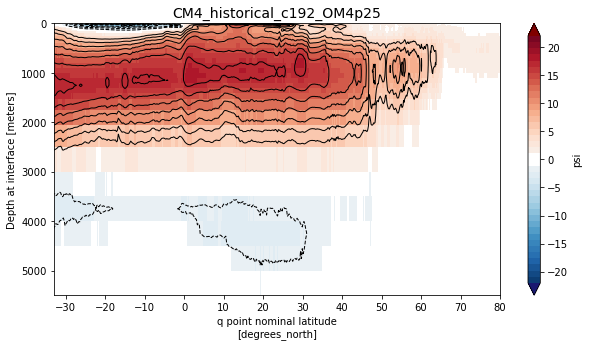

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
amoc_z.mean('time').plot(ax=ax,x='yq', y='lev_outer',yincrease=False, vmin=-22, vmax=22, 
                         cmap=cmap, levels=41, extend='both', cbar_kwargs={'ticks': np.arange(-20,25,5)})
amoc_z.mean('time').plot.contour(ax=ax, x='yq', y='lev_outer', yincrease=False, 
                                 levels=np.concatenate([np.arange(-20,0,2),np.arange(5,22,2)]), colors='k', linewidths=1)
ax.set_xlim((-33,80))
ax.set_xticks(np.arange(-30,90,10))
ax.set_ylim((5500,0))
ax.set_title(subdir,fontsize=14)
plt.show()

In [28]:
var = 'amoc'
fname = subdir+'_AtlArc_%sto%s_%s_z_%s.nc'\
        %(str(amoc_z.time.dt.year[0].values).rjust(4, '0'),str(amoc_z.time.dt.year[-1].values).rjust(4, '0'), var, frq)
print('Saving to file:', fname)
amoc_z.reset_coords(drop=True).to_dataset(name='psi').to_netcdf(outdir+fname, format='NETCDF4')

Saving to file: CM4_historical_c192_OM4p25_AtlArc_1850to2009_amoc_z_annual.nc


In [29]:
amoc_mean = amoc_z.sel(time=slice(yr_st,yr_ed)).mean('time')
y_max_idx = amoc_mean.argmax(dim=['lev_outer', 'yq'])['yq']
z_max_idx = amoc_mean.argmax(dim=['lev_outer', 'yq'])['lev_outer']

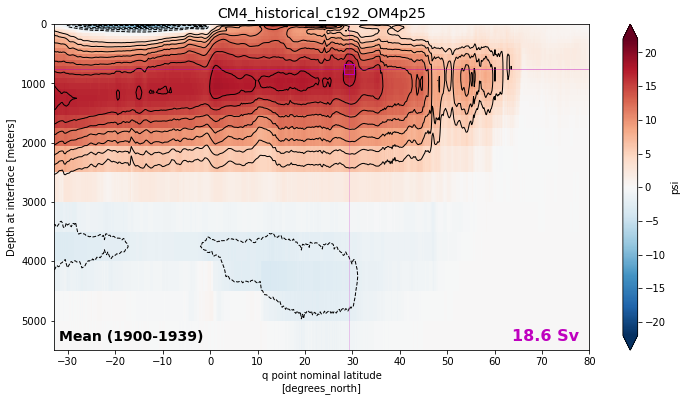

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
amoc_mean.plot(ax=ax, yincrease=False, vmin=-22, vmax=22, cmap='RdBu_r', extend='both',
               cbar_kwargs={'ticks': np.arange(-20,25,5)})
amoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-20,0,2),np.arange(5,22,2)]), 
                       colors='k', linewidths=1)
ax.plot(amoc_mean.yq[y_max_idx], amoc_mean.lev_outer[z_max_idx], marker='s',c='m',ms=10,mew=1,mfc='none')
ax.axvline(x=amoc_mean.yq[y_max_idx], ymin=0, ymax=1, linewidth=1.0, color = 'm',alpha=0.2)
ax.axhline(y=amoc_mean.lev_outer[z_max_idx], xmin=0, xmax=1, linewidth=1.0, color = 'm',alpha=0.4)
ax.text(0.98, 0.02, '%1.1f Sv'%np.round(amoc_mean.isel(lev_outer=z_max_idx,yq=y_max_idx).values,1),
        horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, 
        fontsize=16, fontweight='bold',color='m')
ax.set_xlim((-33,80))
ax.set_xticks(np.arange(-30,90,10))
ax.set_ylim((5500,0))
ax.set_title(subdir,fontsize=14)
ax.text(0.01, 0.02, 'Mean (%s-%s)'%(yr_st,yr_ed), ha='left', va='bottom', fontsize=14, 
        fontweight='bold', transform=ax.transAxes)
plt.show()

In [31]:
amoc_z = xr.open_dataset(outdir+fname).psi

'historical'

In [36]:
df = pd.read_csv(outdir+subdir+'_globalAveOcean.csv',index_col='time')
df = df.reset_index()
if subdir.split('_')[1] == 'piControl':
    df['year'] = df.reset_index()['time'].str.split('-').str[0].astype(int)
else:
    df['year'] = pd.to_datetime(df['time']).dt.year
df = df.set_index('year')

In [37]:
amoc_z_sub = amoc_z.sel(lev_outer=slice(100,2500),yq=slice(0,None))
amoc_z_ann = amoc_z_sub.groupby('time.year').mean('time')
amoc_z_dec = amoc_z_sub.resample({'time':'10A'},loffset='4A').mean()
amoc_z_dec['year'] = amoc_z_dec.time.dt.year
amoc_z_dec = amoc_z_dec.swap_dims({'time': 'year'})

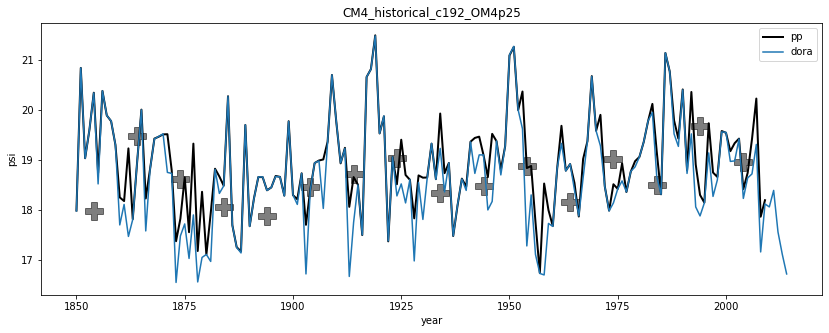

In [39]:
ms = 18
fig, ax = plt.subplots(figsize=(14,5))
amoc_z_ann.max(dim=['lev_outer', 'yq']).plot(ax=ax,lw=2,c='k',label='pp')
amoc_z_dec.max(dim=['lev_outer', 'yq']).isel(year=slice(None,-1)).plot(ax=ax,ls='None',marker='P',ms=ms,c='k',alpha=0.5)
df.amoc_vh.plot(ax=ax,label='dora')
ax.set_title(subdir)
ax.legend()
plt.show()

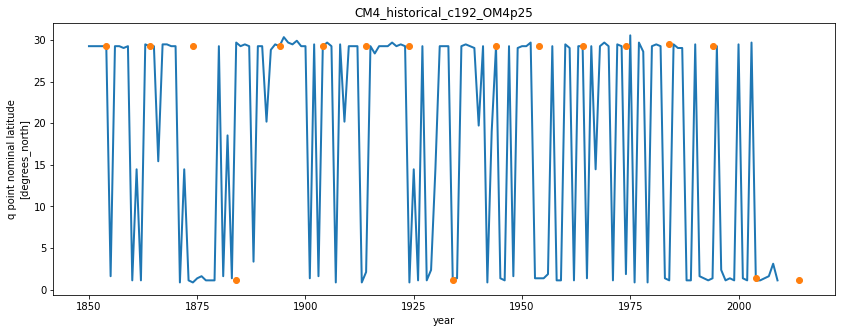

In [42]:
fig, ax = plt.subplots(figsize=(14,5))
amoc_z_ann.yq[amoc_z_ann.argmax(dim=['lev_outer', 'yq'])['yq']].plot(ax=ax,lw=2)
amoc_z_dec.yq[amoc_z_dec.argmax(dim=['lev_outer', 'yq'])['yq']].plot(ax=ax,ls='None',marker='o')
ax.set_title(subdir)
plt.show()